<a href="https://colab.research.google.com/github/samp3209/datamining/blob/main/ClassificationExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

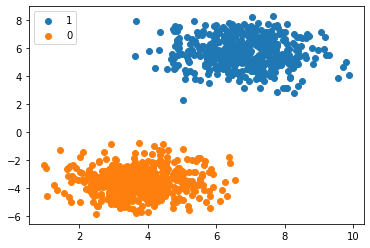

count    100.000000
mean       0.500000
std        0.502519
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
dtype: float64
count    100.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
dtype: float64


In [16]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


X, y = make_blobs(n_samples=1000, centers=2)
counter = Counter(y)

#for i in range(10):
  #print(X[i], y[i])

for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


#x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2)


i=0
kmeans_scores = [None]*100
trees_scores = [None]*100
while i < 100:
  x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2)
  kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train)
#kmeans.labels_

  clf = DecisionTreeClassifier().fit(x_train, y_train)

  y_tree_pred = clf.predict(x_test)
  y_pred = kmeans.predict(x_test)
#print(y_pred[:5])
#print(y_test[:5])
  #print("accuracy", accuracy_score(y_test, y_pred))
  kmeans_scores[i] = accuracy_score(y_test,y_pred)
  trees_scores[i] = clf.score(x_test, y_test)
  i+=1

print(pd.Series(kmeans_scores).describe())
print(pd.Series(trees_scores).describe())
